In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import math
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel

In [2]:
plt.rcParams['figure.figsize'] = [25, 15]

In [3]:
sys.path.insert(0, r'../../src')
from function_cache import *

In [4]:
T_0min = pd.read_csv('../../data/processed/price_before_close/T_0min.csv', index_col='Trading_Day', parse_dates=True)
TF_0min = pd.read_csv('../../data/processed/price_before_close/TF_0min.csv', index_col='Trading_Day', parse_dates=True)
T_5min = pd.read_csv('../../data/processed/price_before_close/T_5min.csv', index_col='Trading_Day', parse_dates=True)
TF_5min = pd.read_csv('../../data/processed/price_before_close/TF_5min.csv', index_col='Trading_Day', parse_dates=True)
T_10min = pd.read_csv('../../data/processed/price_before_close/T_10min.csv', index_col='Trading_Day', parse_dates=True)
TF_10min = pd.read_csv('../../data/processed/price_before_close/TF_10min.csv', index_col='Trading_Day', parse_dates=True)
T_15min = pd.read_csv('../../data/processed/price_before_close/T_15min.csv', index_col='Trading_Day', parse_dates=True)
TF_15min = pd.read_csv('../../data/processed/price_before_close/TF_15min.csv', index_col='Trading_Day', parse_dates=True)

In [5]:
T_features = pd.read_csv('../../data/processed/candidate_features/T_features.csv', index_col=0)
TF_features = pd.read_csv('../../data/processed/candidate_features/TF_features.csv', index_col=0)
T_spread_change = pd.read_csv('../../data/processed/different_ys/T_spread_change.csv', index_col=0)
TF_spread_change = pd.read_csv('../../data/processed/different_ys/TF_spread_change.csv', index_col=0)

In [6]:
features = pd.concat([T_features, TF_features])
spread_change = pd.concat([T_spread_change, TF_spread_change])

In [7]:
X = features.values
y = spread_change['0min_0min'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
svr = LinearSVR(max_iter=10000)
svr.fit(X, y)
print(svr.score(X, y))

0.708220726582951


In [9]:
def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

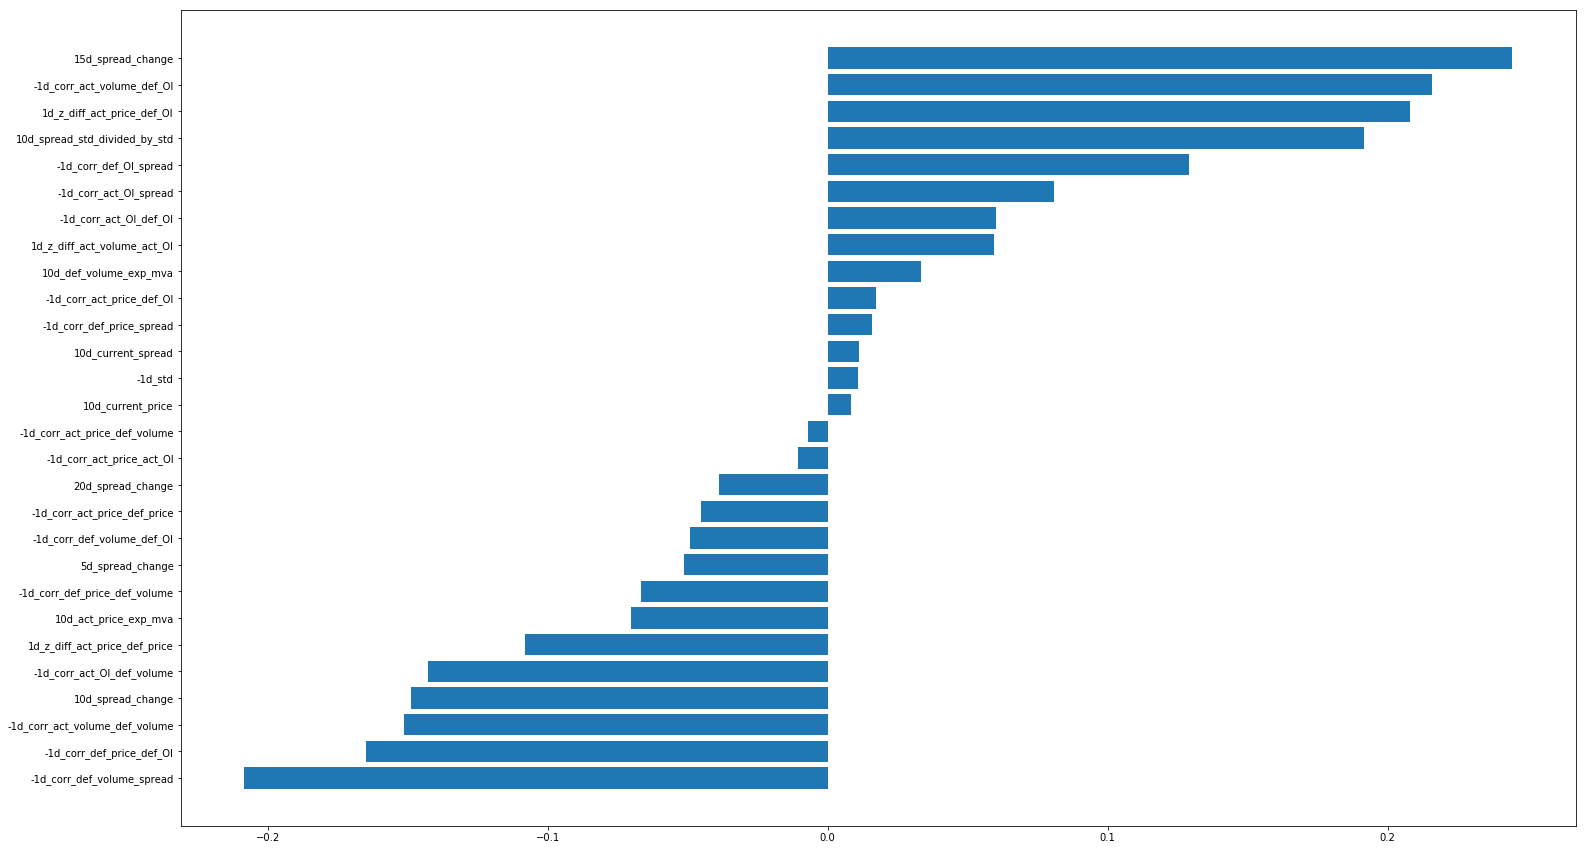

In [10]:
f_importances(svr.coef_, features.columns)

In [11]:
model = SelectFromModel(svr, prefit=True, max_features=4)
feature_idx = model.get_support()
feature_name = features.columns[feature_idx]

In [12]:
feature_name

Index(['15d_spread_change', '-1d_corr_def_volume_spread',
       '1d_z_diff_act_price_def_OI', '-1d_corr_act_volume_def_OI'],
      dtype='object')

In [13]:
FI_sr = pd.Series(np.abs(svr.coef_), features.columns)

In [14]:
FI_sr.sort_values()

-1d_corr_act_price_def_volume     0.006868
10d_current_price                 0.008203
-1d_corr_act_price_act_OI         0.010789
-1d_std                           0.010869
10d_current_spread                0.011297
-1d_corr_def_price_spread         0.015670
-1d_corr_act_price_def_OI         0.017077
10d_def_volume_exp_mva            0.033250
20d_spread_change                 0.038766
-1d_corr_act_price_def_price      0.045351
-1d_corr_def_volume_def_OI        0.049163
5d_spread_change                  0.051375
1d_z_diff_act_volume_act_OI       0.059261
-1d_corr_act_OI_def_OI            0.060005
-1d_corr_def_price_def_volume     0.066721
10d_act_price_exp_mva             0.070219
-1d_corr_act_OI_spread            0.080774
1d_z_diff_act_price_def_price     0.108203
-1d_corr_def_OI_spread            0.128922
-1d_corr_act_OI_def_volume        0.142810
10d_spread_change                 0.148781
-1d_corr_act_volume_def_volume    0.151530
-1d_corr_def_price_def_OI         0.164887
10d_spread_

In [15]:
FI_sr.to_csv('SVR.csv', header=True)